In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lab 4 - Implement & Train a k-Nearest Neighbour Model for Detecting Iris Flower Species

**Problem Statement:** Load the iris dataset. Build a k-NN model with k=3.

Explore the Iris Data using visualizations to understand the relationships among different input features with respect to each species.

Then use all four features: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm) to train the k-NN model to classify a new iris flower into one of three species classes: Iris Virginica, Iris Setosa or Iris Versicolor.

Finally evaluate the model accuracy on the held-out Test Data.

# Loading/Fetching Your Data
The data we will use for this example is the Iris dataset, a classical dataset in machine
learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function:

In [ ]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

# Code that shows the short description of the Iris Dataset
print(iris_dataset['DESCR'][:193] + "\n...")
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

# The value of the key target_names is an array of strings, containing the species of
# flower that we want to predict:
print("\n Target names: {}".format(iris_dataset['target_names']))

# The value of feature_names is a list of strings, giving the description of each feature:
print("\n Feature names: \n{}".format(iris_dataset['feature_names']))

# The data itself is contained in the target and data fields. data contains the numeric
# measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:
print("\n Type of data: {}".format(type(iris_dataset['data'])))

#The rows in the data array correspond to flowers, while the columns represent the four
# measurements that were taken for each flower:
print("\n Shape of data: {}".format(iris_dataset['data'].shape))

# We see that the array contains measurements for 150 different flowers.
# Here are the feature values for the first five samples:
print("\n First five columns of data:\n{}".format(iris_dataset['data'][:5]))

# From this data, we can see that all of the first five flowers have a petal width of 0.2 cm
# and that the first flower has the longest sepal, at 5.1 cm
# The target array that contains the species of each of the flowers that were measured is a
# numpy array:
print("\n Type of target: {}".format(type(iris_dataset['target'])))
print("\n Shape of target: {}".format(iris_dataset['target'].shape))

# The species are encoded as integers from 0 to 2:
print("\n Target:\n{}".format(iris_dataset['target']))


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

 Target names: ['setosa' 'versicolor' 'virginica']

 Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 Type of data: <class 'numpy.ndarray'>

 Shape of data: (150, 4)

 First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

 Type of target: <class 'numpy.ndarray'>

 Shape of target: (150,)

 Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2

# Splitting the Data into Training and Testing Data
To assess the model's performance we split the labelled data we have (our 150 flower measurements) into two parts: training data and testing data.

Scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.

Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [ ]:
from sklearn.model_selection import train_test_split


# The output of the train_test_split function is X_train, X_test, y_train, and y_test,
# which are all NumPy arrays.
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'], random_state=0)

# X_train contains 75% of the rows of the dataset, and  X_test contains the remaining 25%:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


# Knowing Your Data
One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot for each pair of features. This is also known as a scatter matrix or a pair plot. A pair plot looks at all possible pairs of features. If you have a small number of features, such as the four we have here, this is quite reasonable.

Below we draw a pair plot of the features in the training set. The data points are colored according to the species the iris belongs to.

To create the plot, we first convert the
NumPy array into a pandas DataFrame. pandas has a function to create pair plots called scatter_matrix. The diagonal of this matrix is filled with histograms of each feature:

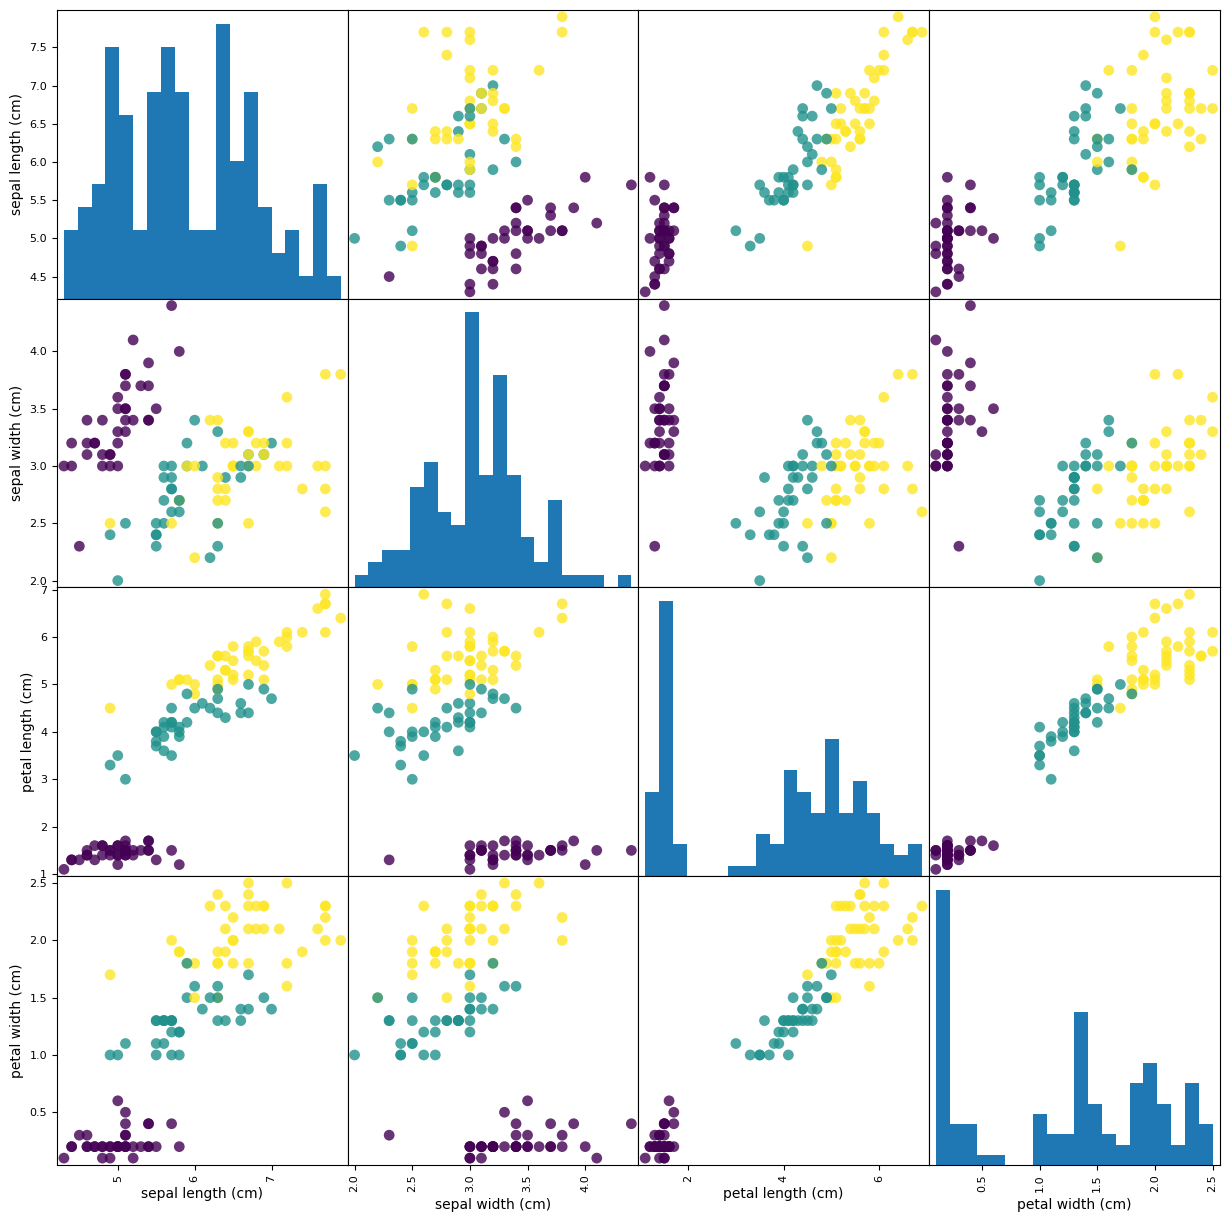

In [ ]:
import pandas as pd
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements.

This means that a machine learning model will likely be able to learn to separate them.

# Building our K-Nearest Neighbours (K-NN) Model
We train a k-nearest neighbours classifier with our training data. Once trained our model should be able to predict the species of any new iris flower given its four features: petal lenght, petal width, sepal length and sepal width in centimeters.

To make a prediction for a new data point, the k-NN algorithm finds the k points in the training set that are closest to the new point. Then, a prediction is made using the majority class among these neighbors.

The k-nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# The most important parameter of KNeighborsClassifier is the number of neighbors,
# which we will set to 3:
knn = KNeighborsClassifier(n_neighbors=3)

# Training the k-NN Model
To train the model on the training set, we call the fit method of the knn object, which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels.

The fit method returns the knn object itself (and modifies it in place), so we get a
string representation of our classifier.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Making Predictions
We can now make predictions using this model on new data for which we might not know the correct labels.

Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. What species of iris would this be?

We can put this data into a NumPy array with shape as number of samples (1) multiplied by number of features (4):


In [ ]:
import numpy as np

# Note that we made the measurements of this single flower into a row in a twodimensional
# NumPy array, as scikit-learn always expects two-dimensional arrays for the data.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

# To make a prediction, we call the predict method of the knn object:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. But how do we know whether we can trust our model? We obviously don’t know the correct
species of this sample.

Thus we need a way to evaluate the accuracy of our model on test data

# Evaluating our k-NN model
we can make a prediction for each iris in the test data and compare it against its label (the known species).

We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# We can also use the score method of the knn object, which will compute the test set
# accuracy for us:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


# Conclusion
For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises.